# Explore here

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error, r2_score


In [194]:
#===============================================================================
#                Cargar Archivos
#===============================================================================

Ruta_Arch = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"

total_data= pd.read_csv(Ruta_Arch, sep = ";")
print(total_data.head())
print(total_data.info())
print(total_data.columns)
print(total_data.shape)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [195]:
print(total_data[total_data.duplicated(keep=False)])


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
4               7.4             0.700         0.00             1.9      0.076   
9               7.5             0.500         0.36             6.1      0.071   
11              7.5             0.500         0.36             6.1      0.071   
22              7.9             0.430         0.21             1.6      0.106   
...             ...               ...          ...             ...        ...   
1567            7.2             0.695         0.13             2.0      0.076   
1579            6.2             0.560         0.09             1.7      0.053   
1581            6.2             0.560         0.09             1.7      0.053   
1592            6.3             0.510         0.13             2.3      0.076   
1596            6.3             0.510         0.13             2.3      0.076   

      free sulfur dioxide  

In [196]:
round(total_data.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [197]:
#===============================================================================
#                Missing Data Ceros, N/A
#===============================================================================
# Count NaN
total_data.isnull().sum().sort_values(ascending=False)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [198]:
#===============================================================================
#               Esta es la descripcion Estadistica de las Columnas
#===============================================================================
total_data['quality'].value_counts().sort_values()


quality
3     10
8     18
4     53
7    199
6    638
5    681
Name: count, dtype: int64

Nos piden que la columna "quality" la llamemos "label"

Y que los resultados sean del 0 al 2

La columna objetivo es label:

0 = Baja calidad

1 = Calidad media

2 = Alta calidad

In [199]:
def Ajuste_Label(dato): 
    if dato <= 4: 
        return 0 
    elif (dato > 4 and dato <= 6): 
        return 1 
    else: return 2

In [200]:
total_data = total_data.rename(columns={'quality': 'label'})
total_data['label'] = total_data['label'].apply(Ajuste_Label)
total_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [201]:
total_data['label'].value_counts().sort_values()

label
0      63
2     217
1    1319
Name: count, dtype: int64

In [202]:

total_data2 = total_data.drop_duplicates()

In [203]:
print(total_data2.head())
print(total_data2.info())
print(total_data2.columns)
print(total_data2.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  label  
0      9.4      1  
1      9.8      1  
2      9.8      1  
3     

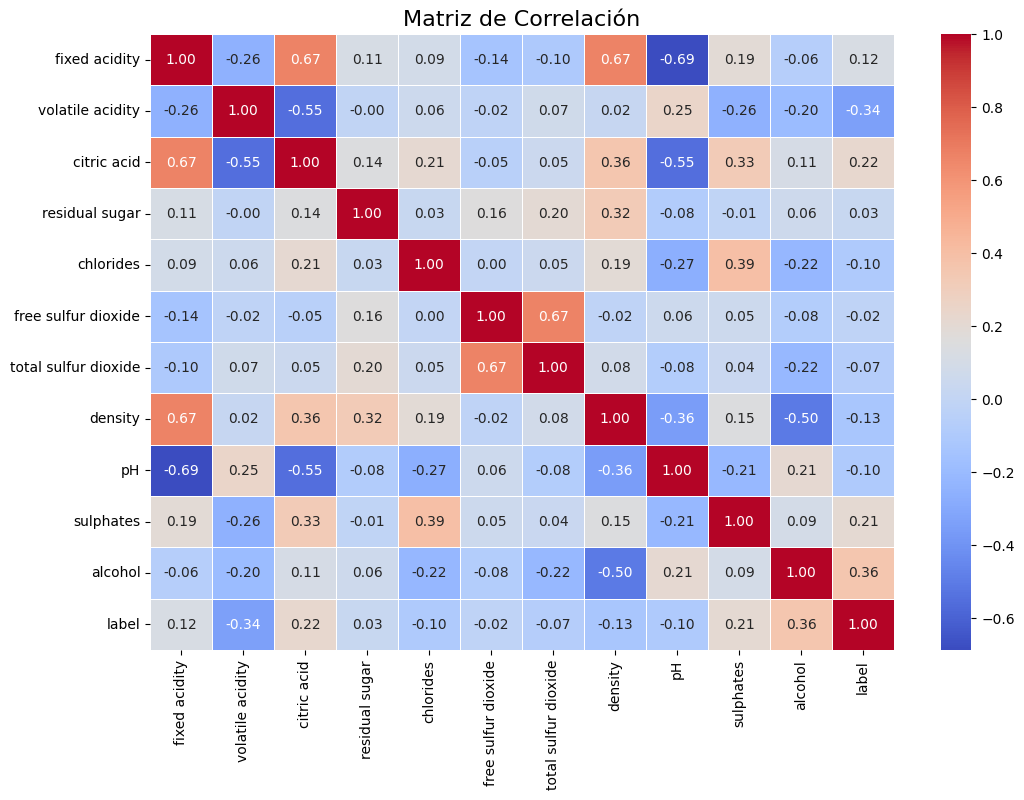

In [204]:
plt.figure(figsize=(12, 8))
sns.heatmap(total_data2.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

In [223]:
corr_Con_label = total_data2.corr()['label'].drop('label')

# Seleccionar variables con |correlación| > 0.2
relevant_features = corr_Con_label[corr_Con_label.abs() > 0.2]
print("Mayor Correlacion:\n", relevant_features)

Mayor Correlacion:
 volatile acidity   -0.337734
citric acid         0.223186
sulphates           0.208731
alcohol             0.358652
Name: label, dtype: float64


In [ ]:
#Variable mas Importantes
Campoos = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity']

In [ ]:
#===============================================================================
#                Detectar Outliners
#===============================================================================
# Detectar outliers usando el método IQR
outliers = {}

for columna in Campoos:
    Q1 = total_data2[columna].quantile(0.25)
    Q3 = total_data2[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.8 * IQR
    outlier_indices = total_data2[(total_data2[columna] < lower_bound) | (total_data2[columna] > upper_bound)].index
    outliers[columna] = len(outlier_indices)
    print(f"'{columna}': {len(outlier_indices)} outliers detectados.")


'alcohol': 7 outliers detectados.
'sulphates': 43 outliers detectados.
'citric acid': 0 outliers detectados.
'volatile acidity': 8 outliers detectados.


Procedo a Eliminar estos Outliners

In [ ]:
def Eliminar_Outliner(Data_frame01, columnas):
    Q1 = Data_frame01[columnas].quantile(0.25)
    Q3 = Data_frame01[columnas].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.8 * IQR
    
    # Filtrar los datos que están dentro de los límites
    Data_frame_filtrado = Data_frame01[
        (Data_frame01[columnas] >= lower_bound) & (Data_frame01[columnas] <= upper_bound)
    ]
    
    return Data_frame_filtrado


#===============================================================================
#                Eliminar Outliners
#===============================================================================
# Copia del DataFrame para no tocar el original


total_data_sin_outliers = total_data2.copy()
for valor in Campoos:
    total_data_sin_outliers = Eliminar_Outliner(total_data_sin_outliers, valor)
print(f"Nuevo tamaño del DataFrame: {total_data_sin_outliers.shape}")



Nuevo tamaño del DataFrame: (1070, 12)


# Divido la Muestra (Train y Test)

In [207]:

#******************************************************************************************************
#                        Split de los Datos
#******************************************************************************************************

X = total_data_sin_outliers.drop(columns='label')
y = total_data_sin_outliers['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Mostrar X
print('El tamaño de X train es de:' ,X_train.shape)
print('El tamaño de Y train es de:' ,y_train.shape)
print('El tamaño de X test es de:' ,X_test.shape)
print('El tamaño de y test es de:' ,y_test.shape)

El tamaño de X train es de: (856, 11)
El tamaño de Y train es de: (856,)
El tamaño de X test es de: (214, 11)
El tamaño de y test es de: (214,)


## Normalización de la Muestra

In [213]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento

In [217]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


In [218]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def Precision_Omega(y_test_o, y_pred_o):
    print(f"Accuracy: {accuracy_score(y_test_o, y_pred_o):.4f}")
    print(f"Precision: {precision_score(y_test_o, y_pred_o, average='macro'):.4f}")
    print(f"Recall: {recall_score(y_test_o, y_pred_o, average='macro'):.4f}")
    print(f"F1 Score: {f1_score(y_test_o, y_pred_o, average='macro'):.4f}")
    print("\nReporte de clasificación:\n", classification_report(y_test_o, y_pred_o))


def Matriz_Confusion(y_test_o, y_pred_o):

    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix

    # Matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test_o, y_pred_o), annot=True, fmt='d', cmap='Reds',
            xticklabels=['Negativas', 'Positivas'], yticklabels=['Negativas', 'Positivas'])
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title("Matriz de Confusión")
    plt.show()

In [219]:
Precision_Omega(y_test, y_pred)


Accuracy: 0.8318
Precision: 0.4404
Recall: 0.4558
F1 Score: 0.4476

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.87      0.94      0.90       180
           2       0.45      0.43      0.44        21

    accuracy                           0.83       214
   macro avg       0.44      0.46      0.45       214
weighted avg       0.78      0.83      0.80       214



c:\Users\Pedro Caliman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Pedro Caliman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Pedro Caliman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

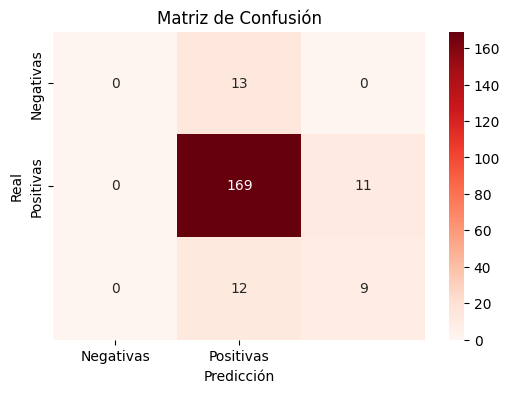

In [220]:
Matriz_Confusion(y_test, y_pred)

### Clase 0: No hubo ninguna predicción correcta (0 de 13). Todos fueron mal clasificados como clase 1. Esto indica que la clase 0 está completamente ignorada por el modelo. 

### Clase 1: Muy bien clasificada: 169 aciertos, aunque hay 11 errores hacia clase 2.

### Clase 2: Más confusa para el modelo. Solo 9 aciertos, y 12 casos fueron confundidos con clase 1.